<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Customer_segmentation_by_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This case study will practice **KMeans algorithm** for clustering modeling to get insight about behaviour group of credit card user.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Load dataset " Credit card"**

In [128]:
df = pd.read_csv('/content/CC GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**2. Data preprocessing**

In [129]:
df.shape # Dataset has 8950 columns and 18 rows

(8950, 18)

In [130]:
df = df.drop('CUST_ID', axis=1) # We drop noise data "CUST_ID"
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [131]:
df.shape  # Now dataset has 17 columns

(8950, 17)

In [132]:
df.isna().sum()  # We find missing values ( 1 data on 'CREDIT_LIMIT' column and 313 datas on 'MINIMUM_PAYMENTS' )

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [133]:
df['CREDIT_LIMIT'].value_counts()   # We get data 'CREDIT_LIMIT' = 3000.000000 as mode.

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [134]:
df['CREDIT_LIMIT'].fillna(3000.000000, inplace=True)  # We fill a missing value with mode data.

In [135]:
df['MINIMUM_PAYMENTS'].value_counts()   # # We get data 'MINIMUM_PAYMENTS' = 299.351881 as mode

299.351881    2
342.286490    1
184.464721    1
276.486072    1
309.140865    1
             ..
181.773223    1
711.894455    1
256.522546    1
127.799107    1
88.288956     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [136]:
df['MINIMUM_PAYMENTS'].fillna(299.351881, inplace=True)   # We fill a missing value with mode data.

In [138]:
df.info()   # Now dataset has not missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

**The best practise we have to do outlier handling before we conduct scaling data. For this cased study we skip this stage because we want to make simple and showing the result of Kmeans algorithm.**

In [11]:
nums=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
      'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY',
      'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
/usr/local/lib/python3.7/dist-packages/ipyker

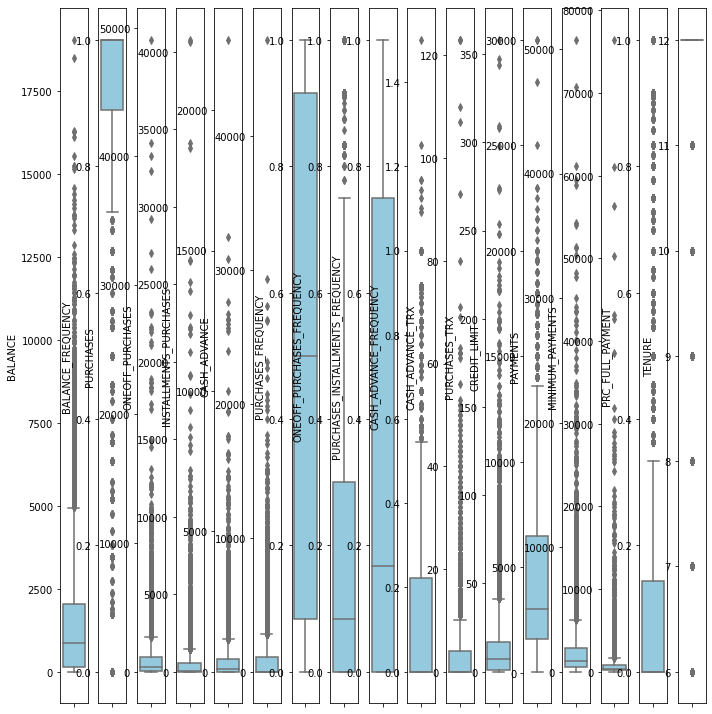

In [19]:
features=nums   # We see the outlier in each columns(featuers)
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],color='skyblue')
    plt.tight_layout()

**Sample how to manage outlier.**

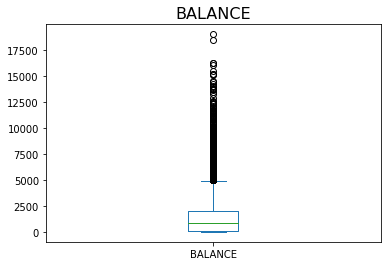

In [42]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=16)
plt.show()

In [45]:
Q1b = df['BALANCE'].quantile(0.25) # Finding Q1 value
Q3b = df['BALANCE'].quantile(0.75) # Finding Q3 value
IQRb = Q3b-Q1b # Calculating IQR
print('Q1b= ', Q1b)
print('Q3b = ', Q3b)
print('IQR BALANCE = ', IQRb)

Q1b=  128.2819155
Q3b =  2054.1400355
IQR BALANCE =  1925.85812


In [46]:
nilai_min = df['BALANCE'].min() # Finding min.value
nilai_max = df['BALANCE'].max() # Finding max.value
 
min_IQRb = Q1b - 1.5 * IQRb # Calculating min. IQR
max_IQRb = Q3b + 1.5 * IQRb # Calculating max. IQR
 
# Conditional to find low outlier
if (nilai_min < min_IQRb): 
 print('Low outlier is found <', min_IQRb)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['BALANCE'] < min_IQRb].index)) 
 
# Conditional to find high outlier
if (nilai_max > max_IQRb):
 print('High outlier is found >', max_IQRb)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['BALANCE'] > max_IQRb].index)) 

High outlier is found > 4942.9272155
High outlier Index :  [15, 21, 24, 28, 30, 32, 36, 38, 44, 59, 70, 75, 79, 86, 87, 89, 90, 107, 109, 112, 113, 120, 124, 128, 133, 138, 142, 143, 150, 153, 156, 165, 174, 193, 195, 199, 203, 207, 208, 210, 220, 223, 224, 236, 248, 249, 254, 258, 263, 265, 273, 274, 280, 289, 291, 297, 304, 321, 322, 352, 357, 367, 368, 369, 371, 376, 380, 387, 393, 398, 404, 416, 417, 423, 428, 429, 430, 435, 441, 445, 451, 453, 468, 470, 488, 491, 495, 501, 509, 520, 526, 537, 539, 545, 550, 551, 552, 557, 558, 569, 576, 577, 582, 585, 591, 597, 602, 606, 610, 613, 615, 622, 637, 643, 646, 647, 652, 669, 676, 679, 681, 696, 708, 710, 716, 723, 726, 735, 739, 755, 757, 760, 762, 763, 768, 780, 782, 786, 800, 842, 848, 851, 853, 856, 866, 878, 883, 886, 898, 902, 903, 909, 916, 922, 928, 939, 977, 989, 1012, 1029, 1030, 1033, 1037, 1042, 1059, 1063, 1091, 1100, 1109, 1114, 1130, 1145, 1147, 1163, 1171, 1195, 1202, 1211, 1216, 1229, 1242, 1262, 1264, 1282, 1288, 1297,

In [47]:
df=df.drop(df[df.BALANCE > 4942].index, axis=0)

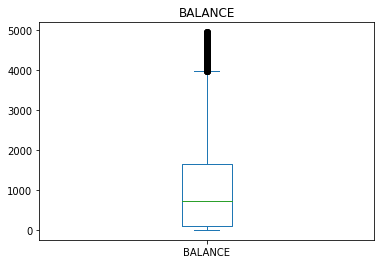

In [49]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=12)
plt.show()

In [50]:
df=df.drop(df[df.BALANCE > 4000].index, axis=0)

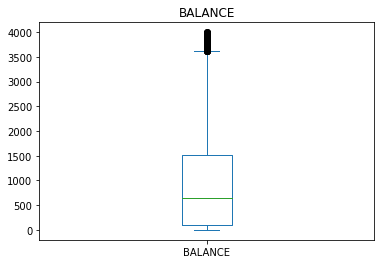

In [51]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=12)
plt.show()

In [52]:
df=df.drop(df[df.BALANCE > 3300].index, axis=0)

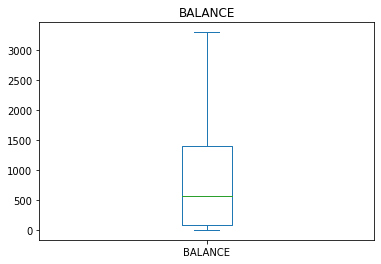

In [53]:
df['BALANCE'].plot(kind='box')
plt.title('BALANCE', size=12)
plt.show()

**2.Data Scaling**

In [107]:
from sklearn.preprocessing import StandardScaler  # We use StandardScaler for scaling data

In [108]:
X=df.values[:,:]
X.shape

(8950, 17)

In [109]:
X=np.nan_to_num(X)

In [111]:
df_cc=StandardScaler().fit_transform(X)
df_cc

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30219162,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09768992,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09309443,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32666531,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33809497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32414873,
        -0.52555097, -4.12276757]])

**3.Modeling data by KMeans**

In [112]:
from sklearn.cluster import KMeans
clstr_nums = 3
k_means = KMeans(init="k-means++", n_clusters=clstr_nums, n_init=12)
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [113]:
k_means_lbl = k_means.labels_ # We define the label for clustering
k_means_lbl

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [114]:
k_means_cltr_cntr = k_means.cluster_centers_  # We determine the cluster center
k_means_cltr_cntr

array([[3.37682451e+03, 9.40893879e-01, 1.58394509e+03, 9.89334502e+02,
        5.94920524e+02, 2.08790518e+03, 5.41583702e-01, 3.18122643e-01,
        3.85703944e-01, 2.09391585e-01, 5.70519481e+00, 2.21445887e+01,
        8.98030500e+03, 2.86666855e+03, 1.54812038e+03, 1.35186513e-01,
        1.17389610e+01],
       [4.79720357e+03, 9.08473866e-01, 1.04707237e+04, 7.39299015e+03,
        3.07789769e+03, 5.38998332e+03, 7.37381261e-01, 5.82882687e-01,
        5.92929851e-01, 2.29106075e-01, 9.18656716e+00, 8.37910448e+01,
        1.24705224e+04, 1.79906949e+04, 2.45784419e+03, 3.26799679e-01,
        1.18432836e+01],
       [8.54405135e+02, 8.54038216e-01, 6.02012470e+02, 3.11449599e+02,
        2.90862392e+02, 4.94248036e+02, 4.67071929e-01, 1.53554670e-01,
        3.52180372e-01, 1.06846882e-01, 2.25438057e+00, 1.06472487e+01,
        2.73720774e+03, 9.95831540e+02, 5.61380241e+02, 1.56728266e-01,
        1.14319090e+01]])

In [115]:
df['CLUSTER']=k_means_lbl  # We merge "CLUSTER" colomn to dataframe

In [117]:
df.sample(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2902,77.305919,0.727273,171.06,0.00,171.06,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,1500.0,329.587528,148.763367,0.000000,12,2
6985,2.484819,0.363636,41.20,41.20,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2000.0,91.092518,104.026643,0.000000,12,2
4689,4.417273,0.181818,27.42,0.00,27.42,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1800.0,228.417814,175.836378,1.000000,12,2
5863,312.928384,1.000000,0.00,0.00,0.00,1800.188812,0.000000,0.000000,0.000000,0.083333,1,0,2800.0,28.380195,193.738387,0.000000,12,2
3902,9.444869,0.363636,127.14,127.14,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,4000.0,0.000000,299.351881,0.000000,12,2
392,1508.513765,0.818182,2747.12,1247.12,1500.00,246.046033,0.250000,0.083333,0.166667,0.083333,1,4,5000.0,4730.374245,481.558276,0.100000,12,2
4376,10571.411070,1.000000,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,44,8000.0,2688.447014,76406.207520,0.000000,12,0
451,4994.048320,1.000000,2506.89,2506.89,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,30,8500.0,1230.219396,1646.973276,0.000000,12,0
798,1716.622291,1.000000,455.76,36.00,419.76,0.000000,1.000000,0.083333,1.000000,0.000000,0,13,1700.0,881.425823,1066.801936,0.000000,12,2
6296,4548.940782,1.000000,2095.49,1349.33,746.16,826.710558,1.000000,0.833333,1.000000,0.166667,3,72,6500.0,1427.071161,1036.041514,0.000000,12,0


In [118]:
df['CLUSTER'].value_counts()  # We observe the distribution data by cluster group. Cluster 2 is the most. Cluster 1 is smallest

2    6513
0    2303
1     134
Name: CLUSTER, dtype: int64

In [119]:
df.groupby('CLUSTER').mean()  # We can get the information about centroid for each feature based on cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,3383.184098,0.940872,1585.042071,989.698029,595.654920,2092.436560,0.540914,0.317425,0.385755,0.209811,5.716457,22.153713,8987.322860,2872.049648,1551.444168,0.135246,11.738168
1,4797.203573,0.908474,10470.723657,7392.990149,3077.897687,5389.983323,0.737381,0.582883,0.592930,0.229106,9.186567,83.791045,12470.522388,17990.694944,2457.844186,0.326800,11.843284
2,854.867411,0.854139,602.679932,312.049628,290.929503,494.358559,0.467389,0.153978,0.352199,0.106809,2.254107,10.656380,2741.436141,995.939508,561.265470,0.156684,11.432520


**INSIGHT**. **CLUSTER 0** = user has medium Balence and medium transaction/shopping. **CLUSTER 1** = user has many Balance and many transaction/shopping. **CLUSTER 2** = user has small Balance and small transaction/shopping

In [122]:
df.groupby('CLUSTER').describe()

BALANCE                                                                \
          count         mean          std       min          25%          50%   
CLUSTER                                                                         
0        2303.0  3383.184098  2848.613282  0.000000   784.866864  3007.664861   
1         134.0  4797.203573  3983.772125  4.382924  1580.555890  3453.316512   
2        6513.0   854.867411   934.416073  0.000000    74.653975   536.027158   

                                   BALANCE_FREQUENCY            ...  \
                 75%           max             count      mean  ...   
CLUSTER                                                         ...   
0        5237.603106  18495.558550            2303.0  0.940872  ...   
1        7049.972675  19043.138560             134.0  0.908474  ...   
2        1346.777622   4931.589653            6513.0  0.854139  ...   

        PRC_FULL_PAYMENT       TENURE                                        \
                     75%  max   count       mean       std  min   25%   50%   
CLUSTER                                                                       
0               0.083333  1.0  2303.0  11.738168  0.968468  6.0  12.0  12.0   
1               0.595833  1.0   134.0  11.843284  0.821282  6.0  12.0  12.0   
2               0.166667  1.0  6513.0  11.432520  1.445498  6.0  12.0  12.0   

                     
          75%   max  
CLUSTER              
0        12.0  12.0  
1        12.0  12.0  
2        12.0  12.0  

[3 rows x 136 columns]

**4. Visualization**

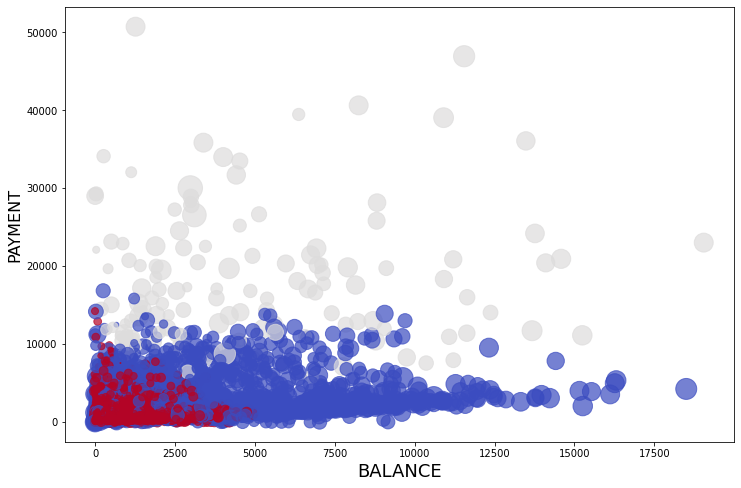

In [124]:
plt.figure(figsize=(12,8))
area = df["CREDIT_LIMIT"]/50
plt.scatter(df['BALANCE'], df['PAYMENTS'], s=area, c=df['CLUSTER'], cmap='coolwarm', alpha=0.7)
plt.xlabel('BALANCE', fontsize=18)
plt.ylabel('PAYMENT', fontsize=16)
plt.show()

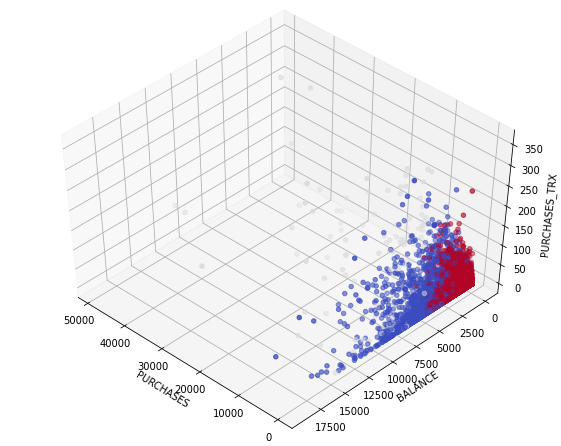

In [125]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('PURCHASES')
ax.set_ylabel('BALANCE')
ax.set_zlabel('PURCHASES_TRX')
ax.scatter(df['PURCHASES'], df['BALANCE'], df['PURCHASES_TRX'], c=df['CLUSTER'],
 cmap='coolwarm')
